In [2]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [4]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
782/782 [==============================] - 16s 20ms/step - loss: 0.5628 - acc: 0.7995 - val_loss: 0.3903 - val_acc: 0.8599
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 0.3973 - acc: 0.8563 - val_loss: 0.3709 - val_acc: 0.8643
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 0.3550 - acc: 0.8714 - val_loss: 0.3514 - val_acc: 0.8715
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 0.3312 - acc: 0.8789 - val_loss: 0.3521 - val_acc: 0.8661
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.3100 - acc: 0.8874 - val_loss: 0.3180 - val_acc: 0.8845
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2979 - acc: 0.8912 - val_loss: 0.3264 - val_acc: 0.8801
Epoch 7/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2897 - acc: 0.8947 - val_loss: 0.3148 - val_acc: 0.8888
Epoch 8/10
782/782 [==============================] - 14s 18ms

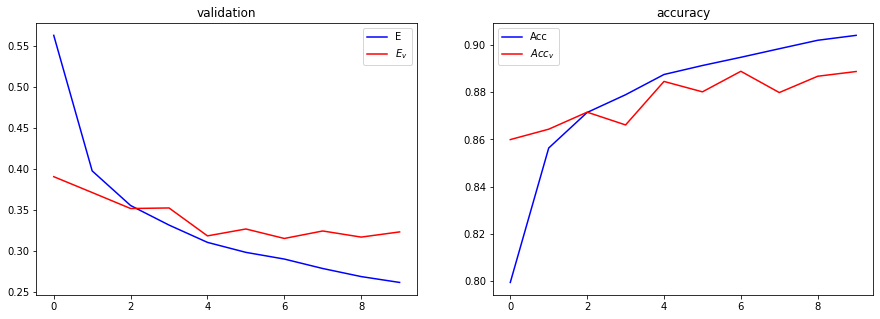

In [7]:
data_dict = val.history
loss = data_dict['loss']
data_loss = data_dict['val_loss']
acc = data_dict['acc']
val_acc = data_dict['val_acc']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss,'b-',label='E')
plt.plot(data_loss,'r-',label='$E_v$')
plt.title('validation')
plt.legend()

plt.subplot(122)
plt.plot(acc,'b-',label='Acc')
plt.plot(val_acc,'r-',label='$Acc_v$')
plt.title('accuracy')
plt.legend()

In [8]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3562 - acc: 0.8787


MLP 분류 결과 87.9%의 정확도가 나왔다. 그래프 데이터를 참고해보면 E와 E_v 데이터 값이 차이가 갈수록 커지는 것을 통해 결과의 오차가 다소 있음을 알 수 있다.